In [1]:
import pandas as pd
import numpy as np
import datetime
import ast

from matplotlib import pyplot as plt


In [2]:
arrest_cluster = pd.read_csv('clustered_arrest.csv')

In [3]:
arrest_cluster = arrest_cluster.drop(columns = ['Unnamed: 0'])

In [4]:
arrest = pd.read_csv('arrest-data-from-2010-to-present.csv')

In [5]:
arrest = arrest.dropna(axis=0)

In [75]:
#date (month, date), and time (hour,  minute)
day = arrest['Arrest Date'].apply(lambda x: int(str(x)[8:10]))
month = arrest['Arrest Date'].apply(lambda x: int(str(x)[5:7]))
hour = arrest['Time'].apply(lambda x: int(str(int(x))[:-2]) if str(int(x))[:-2] != '' else 0)
minute = arrest['Time'].apply(lambda x: int(str(int(x))[-2:]) if str(int(x))[:-2] != '' else 0)

#location (Geographic Areas, latitude, longitude)
area_ID = arrest['Area ID']
area_name = arrest['Area Name']
sub_area = arrest['Reporting District']

latitude = arrest['Location'].apply(lambda x: float(ast.literal_eval(x)['latitude']))
longitude = arrest['Location'].apply(lambda x: float(ast.literal_eval(x)['longitude']))
street = arrest['Address'] #Street address of crime incident rounded to the nearest hundred block to maintain anonymity.

#charge and arrest type
dummies_arrest = arrest['Arrest Type Code'] #A code to indicate the type of charge the individual was arrested for. 
#D - Dependent F - Felony I - Infraction M - Misdemeanor O - Other
dummies_arrest = dummies_arrest.map({'D' : 'Dependent', 'F' : 'Felony', 'I' : 'Infraction', 'M' : 'Misdemeanor', 'O' : 'Other'})

dummies_charge = arrest['Charge Group Code'] #Category of arrest charge.
charge_description = arrest['Charge Group Description']#Defines the Charge Group Code provided.

#Age
age = arrest['Age']
#sex
dummies_sex = arrest['Sex Code']
#race
dummies_race = arrest['Descent Code']



df_feature = pd.concat({'day':day, 'month':month, 
                            'hour':hour, 'minute': minute, 
                            'area':area_ID, 'area_name':area_name, 'sub_area':sub_area,
                            'lat':latitude, 'lon':longitude, 'street':street,
                            'arrest_type':dummies_arrest, 
                            'charge_type': dummies_charge, 'charge_description':charge_description,
                            'age': age, 'sex': dummies_sex, 'race_label':dummies_race
                            },axis=1)


## Merge feature with Cluster label

In [76]:
data = df_feature.reset_index().drop(columns=['index'])
data['grouping'] = arrest_cluster.grouping
data

,day,month,hour,minute,area,area_name,sub_area,lat,lon,street,arrest_type,charge_type,charge_description,age,sex,race_label,grouping
0,22,6,4,0,15,N Hollywood,1543,34.1649,-118.3965,MAGNOLIA AV,Misdemeanor,22.0,Driving Under Influence,31,F,O,0.0
1,22,6,2,40,18,Southeast,1842,33.9310,-118.2739,IMPERIAL,Misdemeanor,22.0,Driving Under Influence,20,M,H,1.0
2,22,6,16,15,12,77th Street,1293,33.9419,-118.3090,W 104TH ST,Felony,12.0,Weapon (carry/poss),14,M,B,2.0
3,22,6,0,0,14,Pacific,1406,34.0240,-118.4090,CULVER BL,Misdemeanor,22.0,Driving Under Influence,35,M,H,1.0
4,22,6,7,25,8,West LA,853,34.0445,-118.4491,SANTAMONICA BL,Misdemeanor,23.0,Moving Traffic Violations,26,M,B,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208255,1,1,22,0,13,Newton,1343,33.9939,-118.2478,COMPTON AV,Misdemeanor,22.0,Driving Under Influence,41,M,H,3.0
208256,1,1,17,25,16,Foothill,1667,34.2360,-118.3674,TUXFORD,Felony,7.0,Vehicle Theft,16,M,H,2.0
208257,1,1,21,50,12,77th Street,1251,33.9745,-118.3309,CRENSHAW,Felony,3.0,Robbery,15,M,B,2.0
208258,1,1,22,15,11,Northeast,1118,34.1101,-118.1918,AVENUE 58,Misdemeanor,24.0,Miscellaneous Other Violations,12,M,H,3.0


From the histogram below:

- cluster 0: slightly more Black and White, and **significantly less Hispanic**
- cluster 1: **significantly less Black**, and slightly more Hispanic and White
- cluster 2: **significantly MORE Black**, and **significantly LESS White**
- cluster 3: **significantly MORE Black**, and **significantly LESS Hispanic**
- cluster 4: **significantly less Black**, and slightly more Hispanic and White.

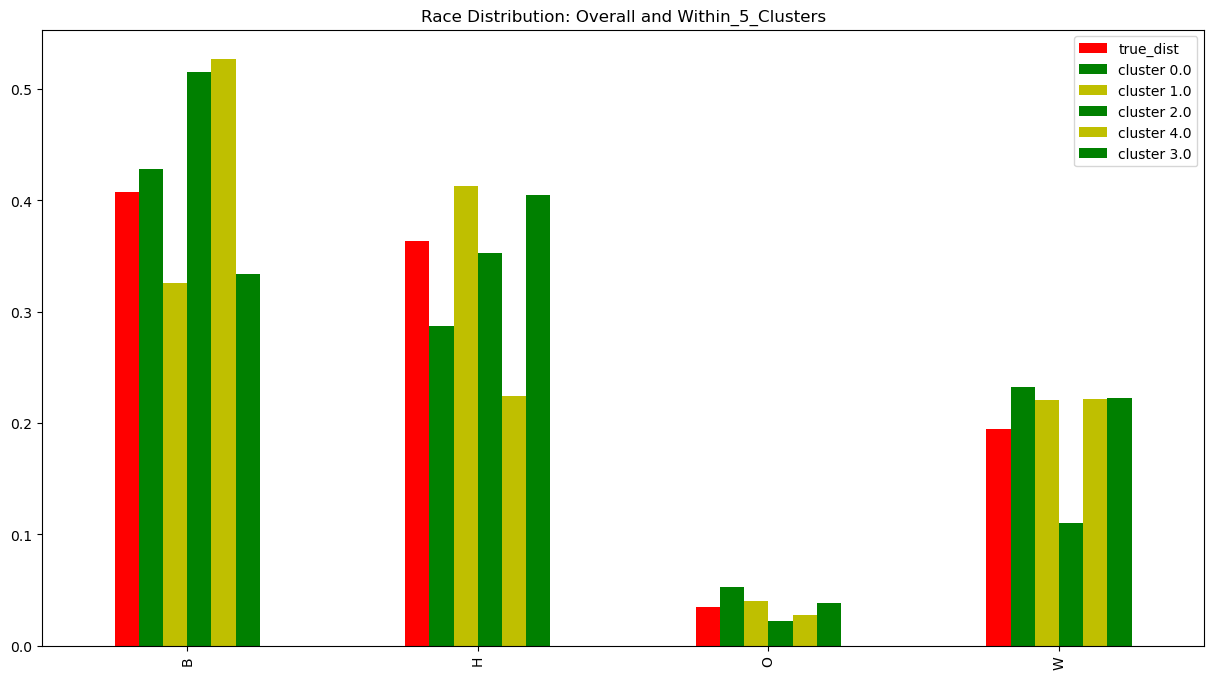

{'true_dist': B    0.407623
 H    0.363628
 W    0.194310
 O    0.034438
 Name: race_label, dtype: float64,
 'cluster 0.0': B    0.428082
 H    0.286652
 W    0.232312
 O    0.052954
 Name: race_label, dtype: float64,
 'cluster 1.0': H    0.413181
 B    0.326150
 W    0.220516
 O    0.040153
 Name: race_label, dtype: float64,
 'cluster 2.0': B    0.515295
 H    0.352453
 W    0.109880
 O    0.022372
 Name: race_label, dtype: float64,
 'cluster 4.0': B    0.527076
 H    0.224272
 W    0.221499
 O    0.027153
 Name: race_label, dtype: float64,
 'cluster 3.0': H    0.405053
 B    0.333627
 W    0.222824
 O    0.038497
 Name: race_label, dtype: float64}

In [77]:
from distribution_plot import *
plot_distribution(data)
get_true_and_cluster_value(data)

## EDA on all data

In [78]:
data

,day,month,hour,minute,area,area_name,sub_area,lat,lon,street,arrest_type,charge_type,charge_description,age,sex,race_label,grouping
0,22,6,4,0,15,N Hollywood,1543,34.1649,-118.3965,MAGNOLIA AV,Misdemeanor,22.0,Driving Under Influence,31,F,O,0.0
1,22,6,2,40,18,Southeast,1842,33.9310,-118.2739,IMPERIAL,Misdemeanor,22.0,Driving Under Influence,20,M,H,1.0
2,22,6,16,15,12,77th Street,1293,33.9419,-118.3090,W 104TH ST,Felony,12.0,Weapon (carry/poss),14,M,B,2.0
3,22,6,0,0,14,Pacific,1406,34.0240,-118.4090,CULVER BL,Misdemeanor,22.0,Driving Under Influence,35,M,H,1.0
4,22,6,7,25,8,West LA,853,34.0445,-118.4491,SANTAMONICA BL,Misdemeanor,23.0,Moving Traffic Violations,26,M,B,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208255,1,1,22,0,13,Newton,1343,33.9939,-118.2478,COMPTON AV,Misdemeanor,22.0,Driving Under Influence,41,M,H,3.0
208256,1,1,17,25,16,Foothill,1667,34.2360,-118.3674,TUXFORD,Felony,7.0,Vehicle Theft,16,M,H,2.0
208257,1,1,21,50,12,77th Street,1251,33.9745,-118.3309,CRENSHAW,Felony,3.0,Robbery,15,M,B,2.0
208258,1,1,22,15,11,Northeast,1118,34.1101,-118.1918,AVENUE 58,Misdemeanor,24.0,Miscellaneous Other Violations,12,M,H,3.0


<font color='red'> Less incident at the end of the month, during winter, at night </font>

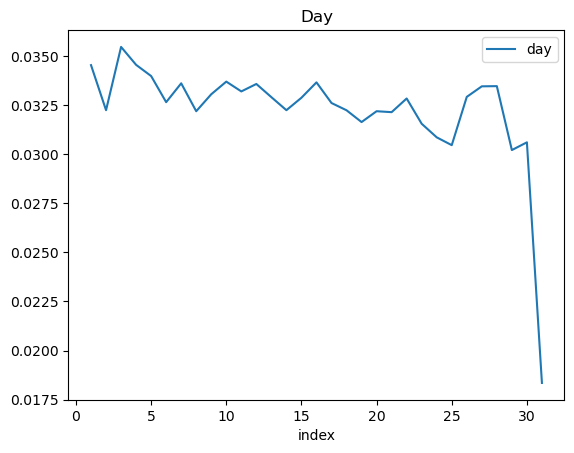

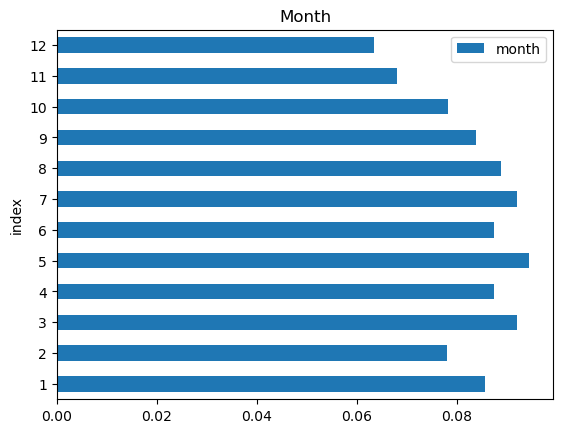

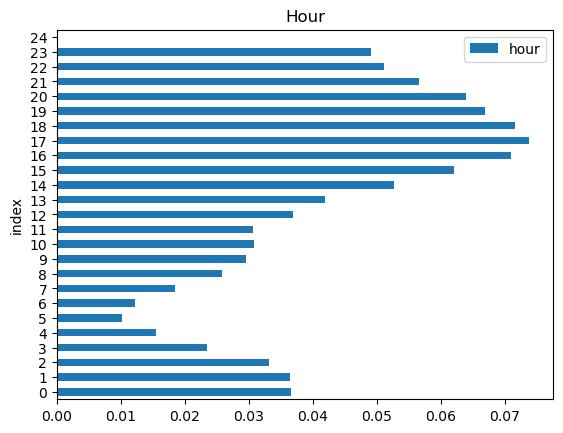

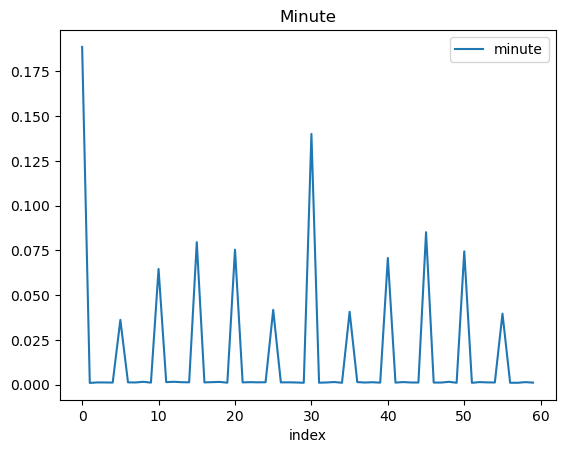

In [79]:
#Day
data['day'].value_counts(normalize=True).reset_index().sort_values(by='index').set_index('index').plot()
plt.title('Day')
plt.show()
#Month
data['month'].value_counts(normalize=True).reset_index().sort_values(by='index').set_index('index').plot(kind='barh')
plt.title('Month')
plt.show()
#Hour
data['hour'].value_counts(normalize=True).reset_index().sort_values(by='index').set_index('index').plot(kind='barh')
plt.title('Hour')
plt.show()
#Minute
data['minute'].value_counts(normalize=True).reset_index().sort_values(by='index').set_index('index').plot()
plt.title('Minute')
plt.show()

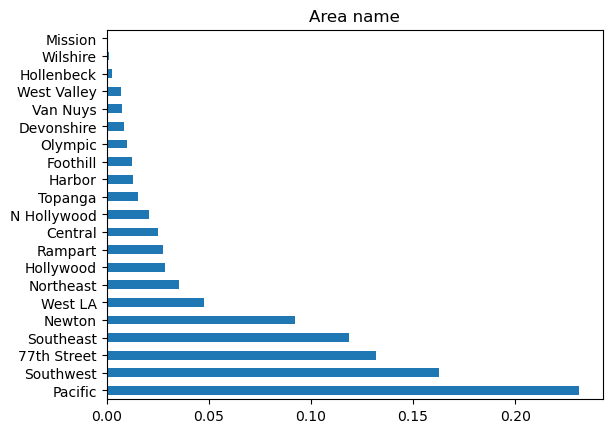

In [80]:
#Area (21 lapd divisions)
data['area_name'].value_counts(normalize=True).plot(kind='barh')
plt.title('Area name')
plt.show()

In [140]:
#lat and long
import seaborn as sns

def plot_area(df):
    
    most_incident_areas = df['area_name'].value_counts(normalize=True).index[:-10] #top 10 areas
    most_area = df[df.area_name.isin(most_incident_areas)]
    sns.scatterplot(data=most_area, hue='area_name', x='lat', y='lon', palette="deep")
#     plt.legend(loc=2)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.title('Top10_Areas')
    plt.show()

#     sns.scatterplot(data=df, hue='area_name', x='lat', y='lon', palette="deep")
#     plt.legend(loc=2)
#     plt.title('All_Areas')
#     plt.show()
    
    return most_incident_areas



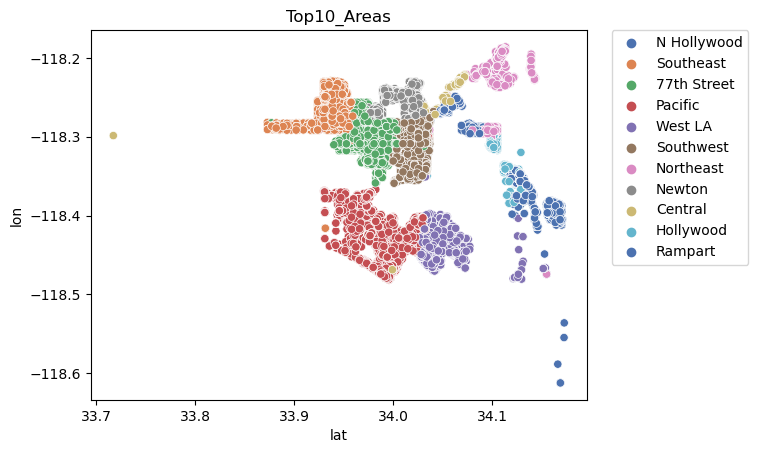

In [141]:
most_areas_all = plot_area(data)

<AxesSubplot:>

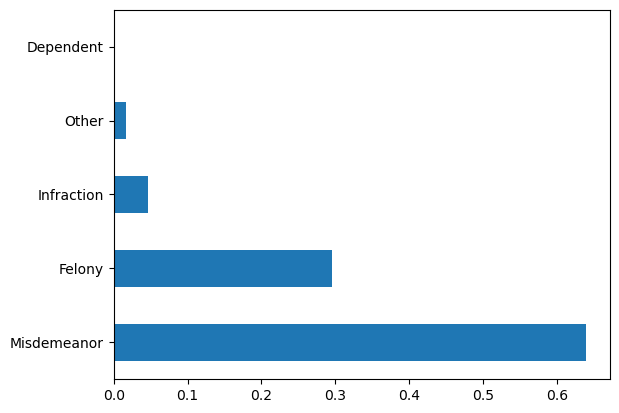

In [85]:
data.arrest_type.value_counts(normalize=True).plot(kind='barh')
plt.title('Arrest Type')
plt.show()

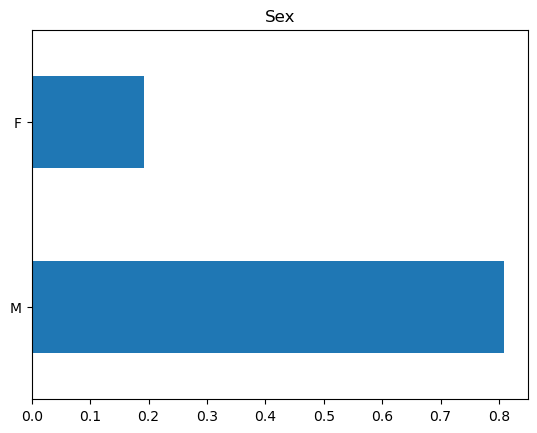

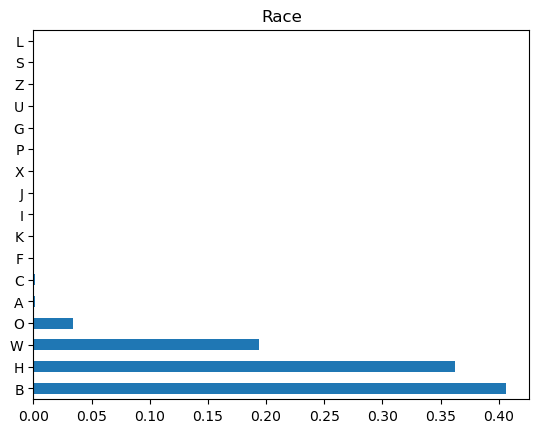

In [95]:
data.sex.value_counts(normalize=True).plot(kind='barh')
plt.title('Sex')
plt.show()

data.race_label.value_counts(normalize=True).plot(kind='barh')
plt.title('Race')
plt.show()

## Checking Location & Area

In [126]:
cluster0 = data[data.grouping == 0.0]
cluster1 = data[data.grouping == 1.0]
cluster2 = data[data.grouping == 2.0]
cluster3 = data[data.grouping == 3.0]
cluster4 = data[data.grouping == 4.0]

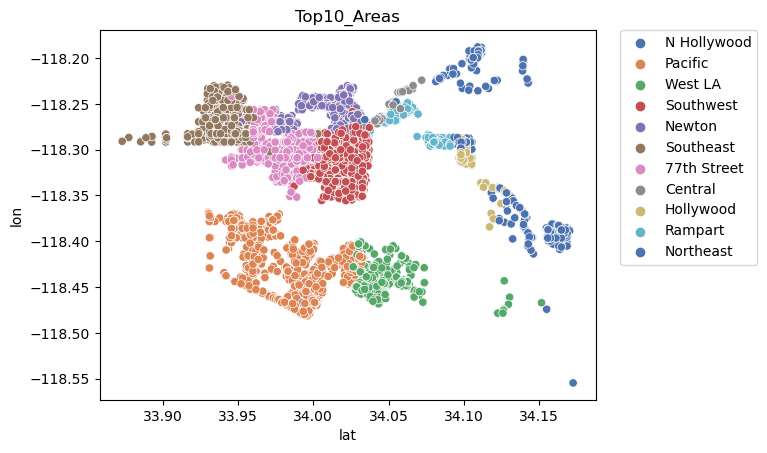

In [142]:
most_area_0 = plot_area(cluster0)
# cluster 0: slightly more Black and White, and significantly less Hispanic

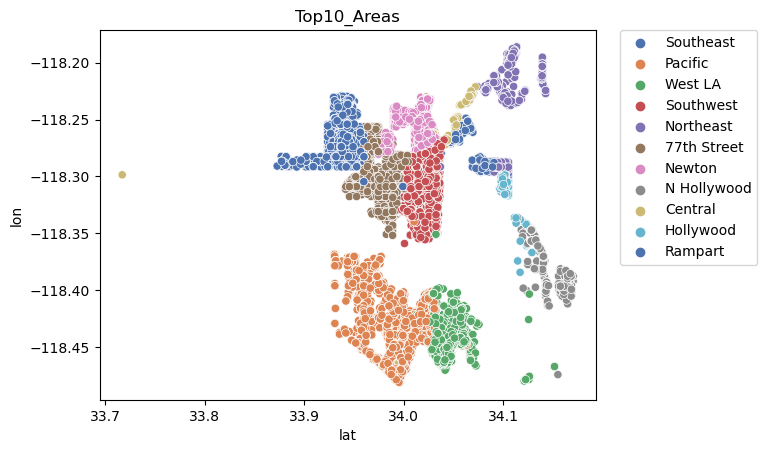

In [143]:
most_area_1 = plot_area(cluster1)
# cluster 1: significantly less Black, and slightly more Hispanic and White

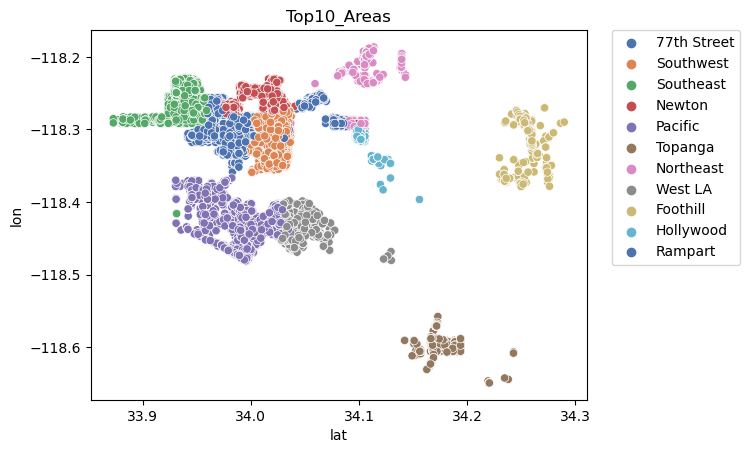

In [144]:
most_area_2 = plot_area(cluster2)
# cluster 2: significantly MORE Black, and significantly LESS White

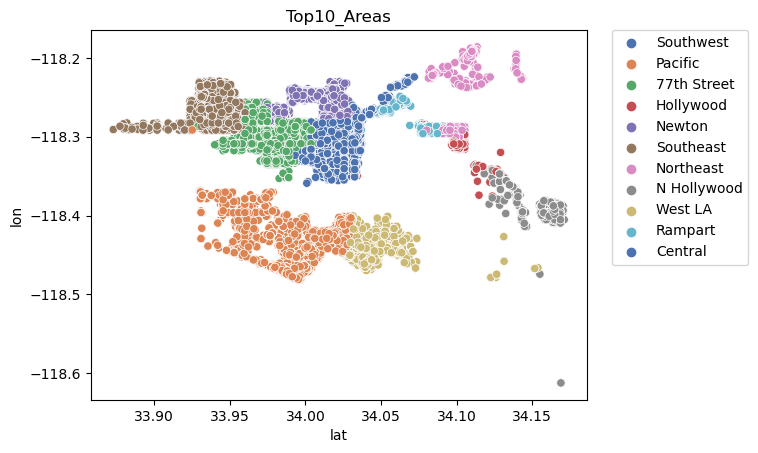

In [145]:
most_area_3 = plot_area(cluster3)
# cluster 3: significantly MORE Black, and significantly LESS Hispanic

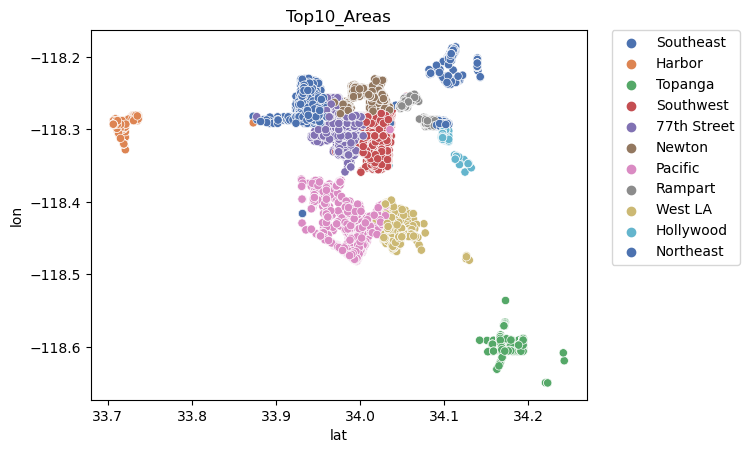

In [146]:
most_area_4 = plot_area(cluster4)
# cluster 4: significantly less Black, and slightly more Hispanic and White.

In [154]:
most_areas_df = pd.DataFrame().assign(most_areas_all = most_areas_all, 
                                      most_area_0=most_area_0, 
                                      most_area_1=most_area_1, 
                                      most_area_2=most_area_2, 
                                      most_area_3=most_area_3, 
                                      most_area_4=most_area_4)
most_areas_df

,most_areas_all,most_area_0,most_area_1,most_area_2,most_area_3,most_area_4
0,Pacific,Pacific,Pacific,77th Street,Pacific,Pacific
1,Southwest,Southwest,Southwest,Southwest,Southwest,Southwest
2,77th Street,Southeast,77th Street,Southeast,77th Street,Southeast
3,Southeast,77th Street,Newton,Newton,Newton,77th Street
4,Newton,N Hollywood,Southeast,Pacific,Southeast,Newton
5,West LA,Hollywood,West LA,Northeast,West LA,West LA
6,Northeast,Newton,Northeast,Rampart,Northeast,Northeast
7,Hollywood,West LA,Central,West LA,Central,Hollywood
8,Rampart,Central,Rampart,Hollywood,Rampart,Harbor
9,Central,Rampart,Hollywood,Foothill,Hollywood,Rampart


- **cluster 0**: more N Hollywood and Hollywood data (slightly more Black and White, and significantly less Hispanic)
- **cluster 1**: about the same with overall areas (significantly less Black, and slightly more Hispanic and White)
- **cluster 2**: <font color='red'>Most 77th Street data</font>, not much Pacific data; has data from Foothill and Topanga, but not include data from N Hollywood and Central. (significantly <font color='red'>MORE Black, and significantly LESS White</font>)
- **cluster 3**: about the same with overall areas (<font color='red'>significantly MORE Black, and significantly LESS Hispanic</font>)
- **cluster 4**: include data from Harbor and Topanga, but not from N Hollywood and Central. (significantly less Black, and slightly more Hispanic and White.)

Some Articles:
https://www.latimes.com/archives/la-xpm-1989-05-14-mn-412-story.html
**from LA Times: "The 77th by the numbers: More yellow crime-scene tape gets strung up in this division than anywhere else in the city. More rapes, more robberies, more assaults. More murders."**


For cluster 2:

Checked the communities in Foothills area: Tujunga, Lakeview Terrace, Sun Valley: neither has large population of Black (Tujunga has mostly White, and the other two has mostly Latino), so foothills prob is not the reason why cluster 2 has more Black.\
Also checked the communities in Topanga: Canoga Park, West Hills, Winnetka, Woodland Hills: all have mostly White and Lanito as well.\
The communities in 77th Street: Athens Park (mostly Black), Chesterfield Square, Gramercy Park, Hyde Park, South Park-51st and Menlo, Vermont Knolls, Vermont Park, View Heights, Morningside Park, West Park Terrance: almost all communities have half or more than half of the population Black.

In [157]:
data['area_name'].value_counts(normalize=True)
areas_dist_df = pd.DataFrame().assign(all_clusters = data['area_name'].value_counts(normalize=True), 
                                      cluster_0_area = cluster0['area_name'].value_counts(normalize=True), 
                                      cluster_1_area = cluster1['area_name'].value_counts(normalize=True), 
                                      cluster_2_area = cluster2['area_name'].value_counts(normalize=True), 
                                      cluster_3_area = cluster3['area_name'].value_counts(normalize=True), 
                                      cluster_4_area = cluster4['area_name'].value_counts(normalize=True))
areas_dist_df


,all_clusters,cluster_0_area,cluster_1_area,cluster_2_area,cluster_3_area,cluster_4_area
Pacific,0.231197,0.180248,0.296455,0.105292,0.295824,0.220147
Southwest,0.162816,0.140846,0.146998,0.189189,0.150767,0.183680
77th Street,0.131802,0.130687,0.093279,0.199992,0.093425,0.167574
Southeast,0.118535,0.134751,0.078330,0.174451,0.081633,0.169990
Newton,0.092284,0.057108,0.086885,0.123618,0.090140,0.064921
West LA,0.047494,0.047094,0.062555,0.023526,0.061688,0.030409
Northeast,0.035307,0.021624,0.039982,0.032066,0.041878,0.023852
Hollywood,0.028575,0.062840,0.028897,0.021818,0.029193,0.021858
Rampart,0.027845,0.031130,0.029670,0.028650,0.029210,0.017409
Central,0.025050,0.035992,0.032516,0.013874,0.030861,0.012079


In [155]:
def total_variation_distance(first_distrib, second_distrib):
    '''Computes the total variation distance between two distributions.'''
    return np.sum(np.abs(first_distrib - second_distrib)) / 2

In [159]:
for col in areas_dist_df.columns[1:]:
    print('tvd between overall and ', str(col), 'is: ', 
          total_variation_distance(np.array(areas_dist_df['all_clusters']), np.array(areas_dist_df[col]))
         )



tvd between overall and  cluster_0_area is:  0.12958554009516537
tvd between overall and  cluster_1_area is:  0.1016226796046803
tvd between overall and  cluster_2_area is:  0.1882949450954664
tvd between overall and  cluster_3_area is:  0.0952661021837108
tvd between overall and  cluster_4_area is:  0.11395355851201795


<font color='red'> As expected, cluster 2 is the most off; cluster 3 is the least off (even though the race distribution also has significantly more Black prob.</font>

if 77th Street is why we have significantly more Black in cluster2:

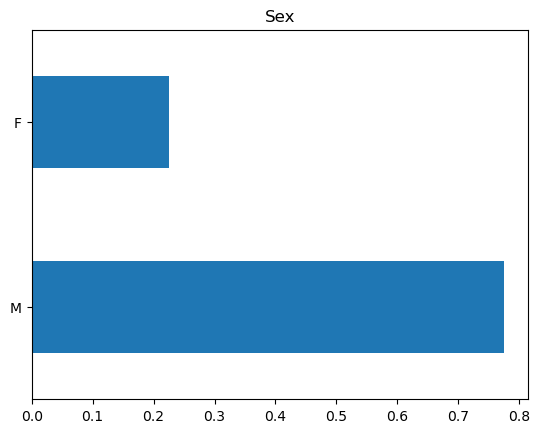

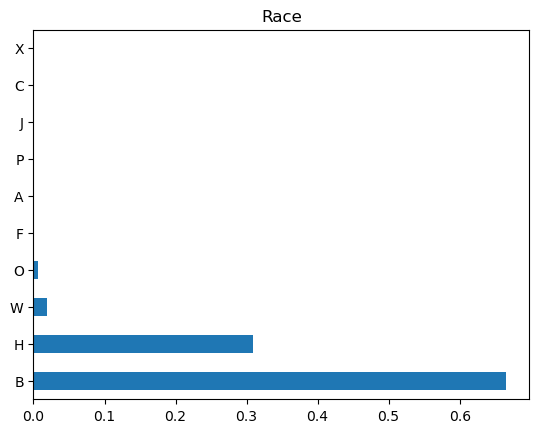

In [162]:
area_77 = data[data['area_name'] == '77th Street']

area_77.sex.value_counts(normalize=True).plot(kind='barh')
plt.title('Sex')
plt.show()

area_77.race_label.value_counts(normalize=True).plot(kind='barh')
plt.title('Race')
plt.show()

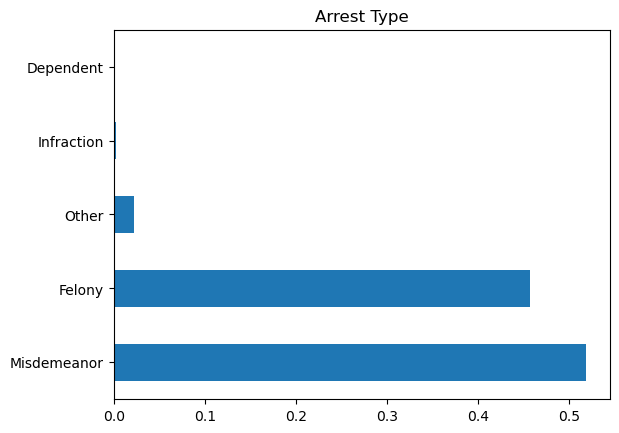

In [163]:
area_77.arrest_type.value_counts(normalize=True).plot(kind='barh')
plt.title('Arrest Type')
plt.show()

77th Street Area has much much more Felony cases, and more Black.

In [178]:
charge_compare_df = pd.DataFrame().assign(overall_charge=data.charge_description.value_counts(normalize=True), 
                                          area77_charge=area_77.charge_description.value_counts(normalize=True))

charge_compare_df


,overall_charge,area77_charge
Miscellaneous Other Violations,0.214011,0.135123
Driving Under Influence,0.142956,0.173085
Narcotic Drug Laws,0.124018,0.139604
Drunkeness,0.120119,0.040621
Moving Traffic Violations,0.059349,0.096980
Liquor Laws,0.052084,0.002259
Prostitution/Allied,0.043547,0.083573
Aggravated Assault,0.034006,0.051732
Vehicle Theft,0.029084,0.052497
Weapon (carry/poss),0.028560,0.059055


In [179]:
data

,day,month,hour,minute,area,area_name,sub_area,lat,lon,street,arrest_type,charge_type,charge_description,age,sex,race_label,grouping
0,22,6,4,0,15,N Hollywood,1543,34.1649,-118.3965,MAGNOLIA AV,Misdemeanor,22.0,Driving Under Influence,31,F,O,0.0
1,22,6,2,40,18,Southeast,1842,33.9310,-118.2739,IMPERIAL,Misdemeanor,22.0,Driving Under Influence,20,M,H,1.0
2,22,6,16,15,12,77th Street,1293,33.9419,-118.3090,W 104TH ST,Felony,12.0,Weapon (carry/poss),14,M,B,2.0
3,22,6,0,0,14,Pacific,1406,34.0240,-118.4090,CULVER BL,Misdemeanor,22.0,Driving Under Influence,35,M,H,1.0
4,22,6,7,25,8,West LA,853,34.0445,-118.4491,SANTAMONICA BL,Misdemeanor,23.0,Moving Traffic Violations,26,M,B,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208255,1,1,22,0,13,Newton,1343,33.9939,-118.2478,COMPTON AV,Misdemeanor,22.0,Driving Under Influence,41,M,H,3.0
208256,1,1,17,25,16,Foothill,1667,34.2360,-118.3674,TUXFORD,Felony,7.0,Vehicle Theft,16,M,H,2.0
208257,1,1,21,50,12,77th Street,1251,33.9745,-118.3309,CRENSHAW,Felony,3.0,Robbery,15,M,B,2.0
208258,1,1,22,15,11,Northeast,1118,34.1101,-118.1918,AVENUE 58,Misdemeanor,24.0,Miscellaneous Other Violations,12,M,H,3.0
